Dataset 'stock_prices.csv' created successfully!


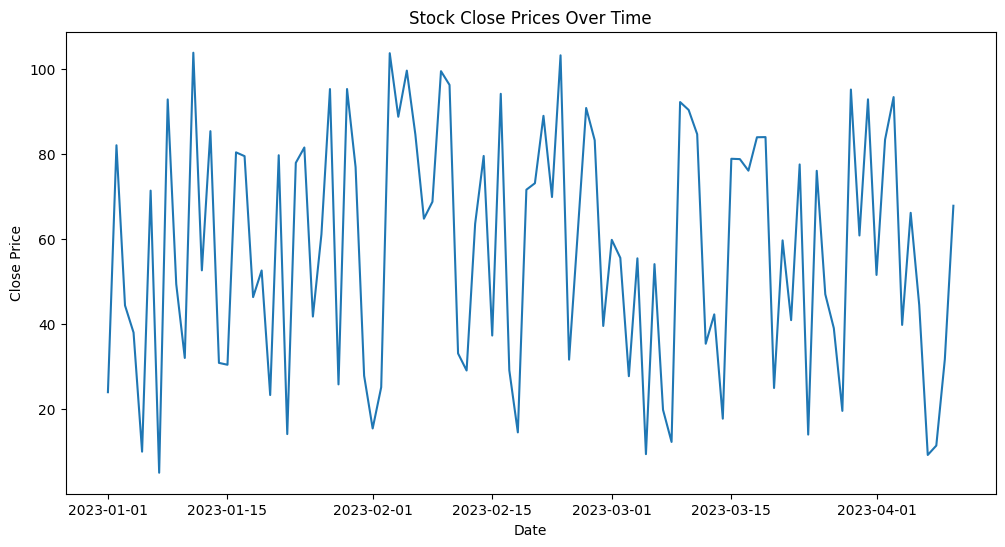

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


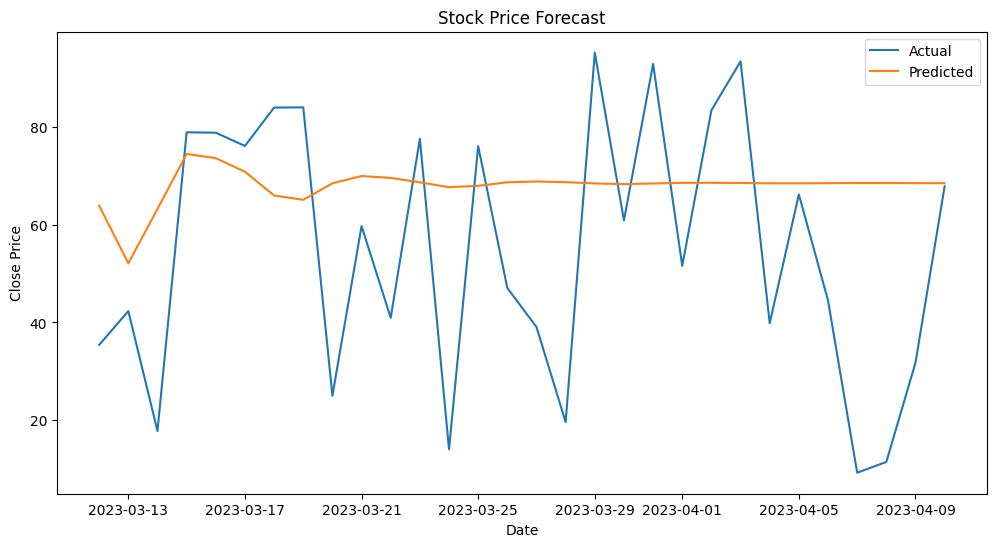

Mean Absolute Error (MAE): 23.744842235518185
Root Mean Squared Error (RMSE): 29.040764714751962


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Install necessary libraries
!pip install statsmodels


# Generate sample data
num_days = 100
dates = pd.date_range(start='2023-01-01', periods=num_days)
open_prices = np.random.rand(num_days) * 100
close_prices = open_prices + np.random.rand(num_days) * 10
volumes = np.random.randint(1000, 10000, size=num_days)

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Open': open_prices, 'Close': close_prices, 'Volume': volumes})

# Save to CSV
df.to_csv('stock_prices.csv', index=False)

print("Dataset 'stock_prices.csv' created successfully!")

df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna() #Handle missing values
df = df.set_index('Date')

# 2. Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('Stock Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# 3. Feature Engineering
df['Lagged_Close'] = df['Close'].shift(1)
df['MA_7'] = df['Close'].rolling(window=7).mean()
df = df.dropna()

# 4. Model Training
# Split data into training and testing sets
train_data = df[:-30] #Example: last 30 days for testing
test_data = df[-30:]

# Fit ARIMA model
p, d, q = 5, 1, 0
model = ARIMA(train_data['Close'], order=(p, d, q))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train_data), end=len(df)-1)

# 5. Model Evaluation & Visualization
plt.figure(figsize=(12, 6))
plt.plot(test_data['Close'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

mae = mean_absolute_error(test_data['Close'], predictions)
rmse = np.sqrt(mean_squared_error(test_data['Close'], predictions))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Further analysis and parameter tuning can be performed here
